In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [157]:
data=pd.read_csv('Algerian_forest_fires_dataset.csv')
BejaiaRegion=data.head(122).reset_index(drop=True)
SidiBel=data.tail(122).reset_index(drop=True)

In [158]:
BejaiaRegion.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [159]:
SidiBel.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
1,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
2,3,6,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
3,4,6,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire
4,5,6,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire


In [160]:
BejaiaRegion.dtypes

day            object
month          object
year           object
Temperature    object
 RH            object
 Ws            object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
dtype: object

In [161]:
BejaiaRegion.isna().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [162]:
SidiBel.isna().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

In [163]:
SidiBel.loc[SidiBel.FWI=='fire   ','Classes']='fire'
SidiBel.loc[SidiBel.FWI=='fire   ','FWI']=np.nan

In [164]:
for i in list(BejaiaRegion.columns):
    BejaiaRegion.rename(columns={i:i.replace(' ','')},inplace=True)

for i in list(SidiBel.columns):
    SidiBel.rename(columns={i:i.replace(' ','')},inplace=True)

BejaiaRegion.dtypes

day            object
month          object
year           object
Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
dtype: object

In [165]:
BejaiaRegion.day=BejaiaRegion.day.astype(int)
BejaiaRegion.month=BejaiaRegion.month.astype(int)
BejaiaRegion.year=BejaiaRegion.year.astype(int)
BejaiaRegion.Temperature=BejaiaRegion.Temperature.astype(int)
BejaiaRegion.RH=BejaiaRegion.RH.astype(int)
BejaiaRegion.Ws=BejaiaRegion.Ws.astype(int)
BejaiaRegion.Rain=BejaiaRegion.Rain.astype(float)
BejaiaRegion.FFMC=BejaiaRegion.FFMC.astype(float)
BejaiaRegion.DMC=BejaiaRegion.DMC.astype(float)
BejaiaRegion.DC=BejaiaRegion.DC.astype(float)
BejaiaRegion.ISI=BejaiaRegion.ISI.astype(float)
BejaiaRegion.BUI=BejaiaRegion.BUI.astype(float)
BejaiaRegion.FWI=BejaiaRegion.FWI.astype(float)
BejaiaRegion.Classes=BejaiaRegion.Classes.astype(str)

SidiBel.DC=SidiBel.DC.apply(lambda x: str(x).replace(' ',''))

SidiBel.day=SidiBel.day.astype(int)
SidiBel.month=SidiBel.month.astype(int)
SidiBel.year=SidiBel.year.astype(int)
SidiBel.Temperature=SidiBel.Temperature.astype(int)
SidiBel.RH=SidiBel.RH.astype(int)
SidiBel.Ws=SidiBel.Ws.astype(int)
SidiBel.Rain=SidiBel.Rain.astype(float)
SidiBel.FFMC=SidiBel.FFMC.astype(float)
SidiBel.DMC=SidiBel.DMC.astype(float)
SidiBel.DC=SidiBel.DC.astype(float)
SidiBel.ISI=SidiBel.ISI.astype(float)
SidiBel.BUI=SidiBel.BUI.astype(float)
SidiBel.FWI=SidiBel.FWI.astype(float)
SidiBel.Classes=SidiBel.Classes.astype(str)

In [166]:
SidiBel.FWI.fillna(np.mean(SidiBel.FWI),inplace=True)

C:\Users\anshv\AppData\Local\Temp\ipykernel_17520\2765352902.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  SidiBel.FWI.fillna(np.mean(SidiBel.FWI),inplace=True)


In [167]:
SidiBel.isna().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Classes        0
dtype: int64

In [168]:
BejaiaRegion['Region']=0
SidiBel['Region']=1

In [169]:
BejaiaRegion.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [170]:
SidiBel.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Classes,Region
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,nan,1
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,nan,1
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,nan,1
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,nan,1
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,nan,1


In [171]:
dataset=pd.concat([BejaiaRegion,SidiBel])
dataset.head()

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [ ]:
dataset.Classes=dataset.Classes.astype('category')
dataset.Region=dataset.Region.astype('category')

In [97]:
dataset.reset_index(drop=True)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,notfire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,notfire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,notfire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,notfire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,notfire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,notfire,1
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,notfire,1
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,notfire,1


In [98]:
dataset.Classes=dataset.Classes.apply(lambda x: str(x).replace(' ',''))

In [99]:
dataset.dtypes

day               int64
month             int64
year              int64
Temperature       int64
RH                int64
Ws                int64
Rain            float64
FFMC            float64
DMC             float64
DC              float64
ISI             float64
BUI             float64
FWI             float64
Classes        category
Region         category
dtype: object

In [ ]:
dataset.Classes=dataset.Classes.cat.codes

---
Classes: 1= Not Fire, 0= Fire <bR>
Region: 0=Bejaia Region, 1= SidiBel Region

In [ ]:
dataset

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0,1
118,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1,1
119,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1,1
120,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,1


In [104]:
dataset.to_csv('Cleaned_Algerian_forest_fires_dataset.csv',index=False)

In [105]:
dataset.Classes.value_counts()

Classes
0    138
1    106
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x22f800ebca0>,
 [Text(-0.22500729230969246, 1.0767412495151567, 'Fire'),
  Text(0.22500725808384633, -1.0767412566673527, 'Not Fire')],
 [Text(-0.12273125035074132, 0.587313408826449, '56.6%'),
  Text(0.12273123168209799, -0.5873134127276468, '43.4%')])

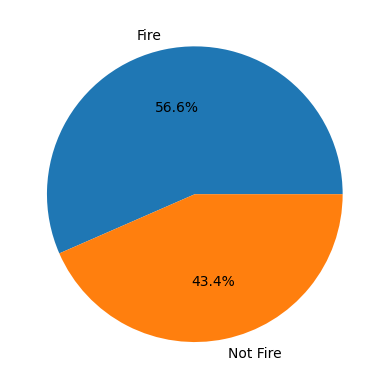

In [110]:
plt.pie(dataset['Classes'].value_counts(normalize=True),labels=['Fire', 'Not Fire'],autopct='%1.1f%%')

In [111]:
dataset.drop(['day','month','year'],axis=1,inplace=True)
dataset

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
117,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0,1
118,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1,1
119,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1,1
120,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,1


In [ ]:
dataset.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370511,0.607551,0.455504,0.565636,-0.518119,0.273496
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220344,-0.690637,-0.348587,-0.578895,0.435023,-0.406424
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076253,0.015248,0.029756,0.033036,0.066529,-0.176829
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296808,-0.347105,-0.299171,-0.324571,0.379449,-0.041080
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503919,0.739730,0.589652,0.690859,-0.770114,0.224680
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875362,0.674499,0.982073,0.875640,-0.584188,0.191094
DC,0.370511,-0.220344,0.076253,-0.296808,0.503919,0.875362,1.000000,0.498926,0.941906,0.738063,-0.507132,-0.081482
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498926,1.000000,0.635891,0.917777,-0.735511,0.268421
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.941906,0.635891,1.000000,0.857200,-0.583882,0.087370
FWI,0.565636,-0.578895,0.033036,-0.324571,0.690859,0.875640,0.738063,0.917777,0.857200,1.000000,-0.718733,0.197493


<Axes: >

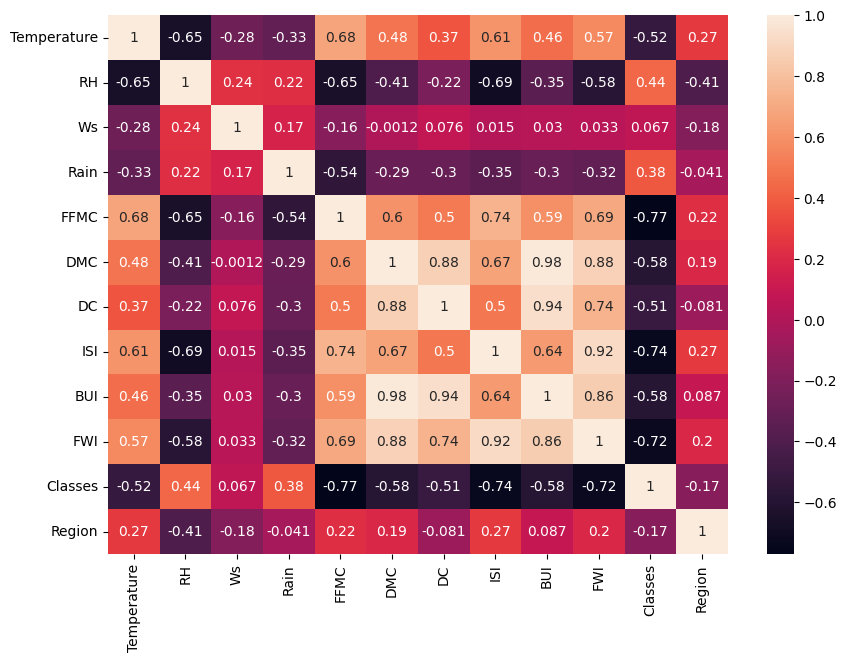

In [122]:
fig, ax = plt.subplots(figsize=(10,7)) 
sb.heatmap(dataset.corr(),annot=True)

In [123]:
dataset2=pd.read_csv('Cleaned_Algerian_forest_fires_dataset.csv')
dataset2

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0,1
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1,1
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1,1
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,1


---
# Bejaia Region

C:\Users\anshv\AppData\Local\Temp\ipykernel_17520\1959898702.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sb.barplot(dataset2[dataset2['Region']==0][dataset2['Classes']==0].month.value_counts())


<Axes: xlabel='month', ylabel='count'>

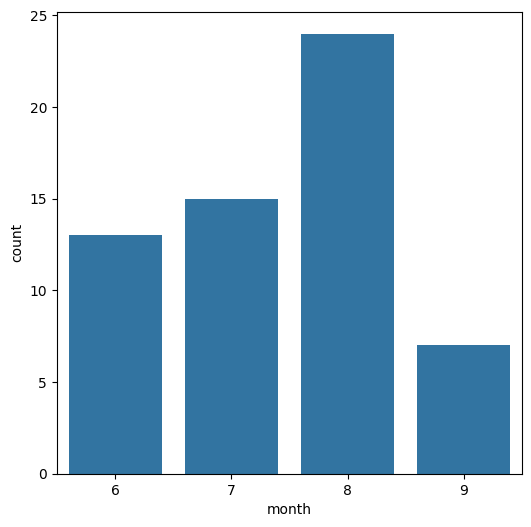

In [191]:
plt.subplots(figsize=(6,6))
sb.barplot(dataset2[dataset2['Region']==0][dataset2['Classes']==0].month.value_counts())

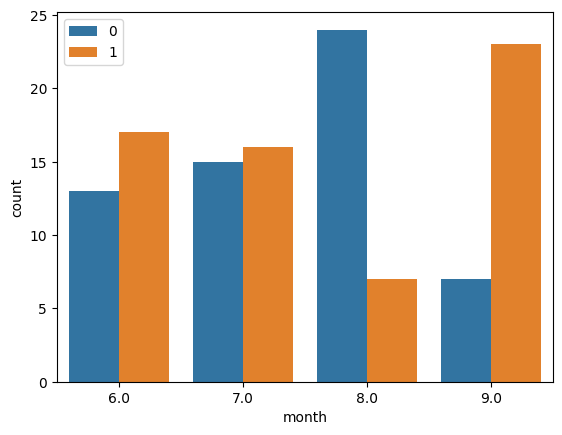

In [200]:
sb.countplot(x=dataset2[dataset2['Region']==0].month,hue=dataset2.Classes)
plt.legend()

C:\Users\anshv\AppData\Local\Temp\ipykernel_17520\1853913602.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataset2[dataset2['Region']==0][dataset2['Classes']==0].month.value_counts()


month
8    24
7    15
6    13
9     7
Name: count, dtype: int64